<a href="https://colab.research.google.com/github/choiseoyoungg/class_deeplearningportpolio/blob/main/regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 

In [1]:
import tensorflow as tf


In [3]:
X=[1,2,3]
Y=[1,2,3]

#hypothesis
W=tf.Variable(tf.random.normal([1]), name='weight')
b=tf.Variable(tf.random.normal([1]), name='bias')

def hypothesis(x):
  return W*x+b

#cost function
def cost_fn(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred-y_true))

#decent algorithm
optimizer=tf.optimizers.SGD(learning_rate=0.01)

In [4]:
#train
def train():
  with tf.GradientTape() as g:
    pred=hypothesis(X)
    cost=cost_fn(pred,Y)

  #gradient 계산
  gradients=g.gradient(cost, [W,b])

  #가중치, bias 업뎃
  optimizer.apply_gradients(zip(gradients,[W,b]))

In [5]:
#가중치, bias 업데이트를 위한 학습
for step in range(2001):
  train()

  if step%500==0:
    pred=hypothesis(X)
    cost=cost_fn(pred,Y)

    print("step={}, cost={}, W={}, b={}".format(step+1, cost, W.numpy(),b.numpy()))
    

step=1, cost=17.741914749145508, W=[-1.1614146], b=[0.49824557]
step=501, cost=0.01905301958322525, W=[0.83968365], b=[0.36443675]
step=1001, cost=0.0017166977049782872, W=[0.9518781], b=[0.10939244]
step=1501, cost=0.00015467451885342598, W=[0.9855554], b=[0.03283601]
step=2001, cost=1.3935817150922958e-05, W=[0.99566424], b=[0.00985624]


In [6]:
for step in range(2001):
  train()

  if step%500==0:
    pred=hypothesis(X)
    cost=cost_fn(pred, Y)
    print("step=", '%04d'%(step+1),"cost={}, W={}, b={}".format(cost, W.numpy(), b.numpy()))

step= 0001 cost=1.386891381116584e-05, W=[0.99567467], b=[0.00983255]
step= 0501 cost=1.249802267011546e-06, W=[0.9987016], b=[0.00295158]
step= 1001 cost=1.1277396794184824e-07, W=[0.99960995], b=[0.00088652]
step= 1501 cost=1.0234567859868093e-08, W=[0.9998826], b=[0.00026699]
step= 2001 cost=9.281582724618431e-10, W=[0.99996454], b=[8.052986e-05]


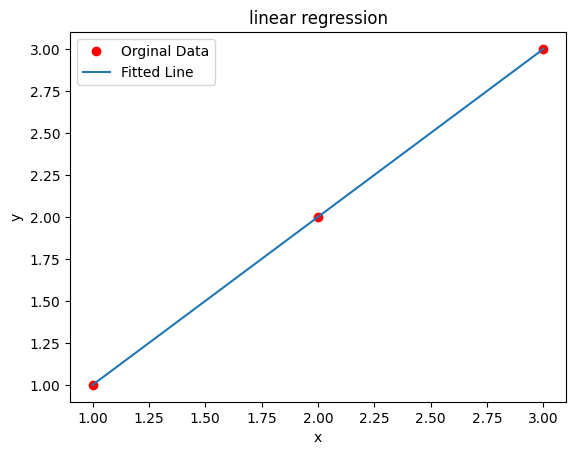

In [7]:
#시각화
import matplotlib.pyplot as plt
import numpy as np

plt.plot(X,Y,'ro',label='Orginal Data')
plt.plot(X, np.array(W*X+b), label='Fitted Line')
plt.legend()
plt.title('linear regression')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
#prediction

x_test=[10]
x_test_predict=np.array(x_test*W+b)
print("**************")
print("if 10 appear, then coreect!!!",x_test_predict)

**************
if 10 appear, then coreect!!! [9.999725]
